In [2]:
import numpy as np
import matplotlib.pyplot as plt
from utils import load_dataset
from model.model_utils import bag_of_words_matrix, labels_matrix
from model.ffnn import NeuralNetwork
from helper import batch_train, minibatch_train

In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_prime(z):
    s = sigmoid(z)
    return s * (1 - s)


In [4]:
def relu(z):
    return np.maximum(z, 0)

def relu_prime(z):
    return (z > 0).astype(float)


In [5]:
z = np.linspace(-10, 10, 1000)

relu_vals = relu(z)
relu_prime_vals = relu_prime(z)
sigmoid_vals = sigmoid(z)
sigmoid_prime_vals = sigmoid_prime(z)

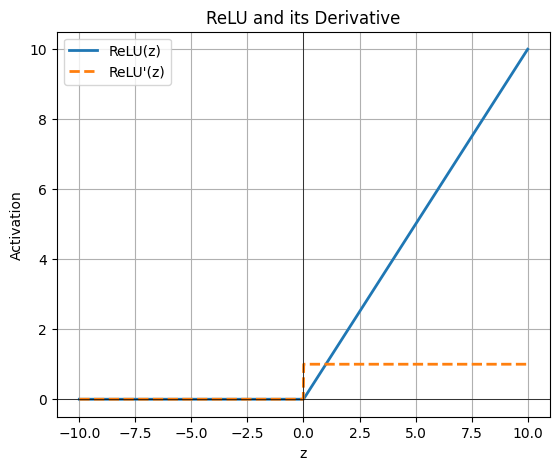

In [6]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(z, relu_vals, label='ReLU(z)', linewidth=2)
plt.plot(z, relu_prime_vals, label="ReLU'(z)", linestyle='--', linewidth=2)
plt.xlabel('z')
plt.ylabel('Activation')
plt.title('ReLU and its Derivative')
plt.legend()
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

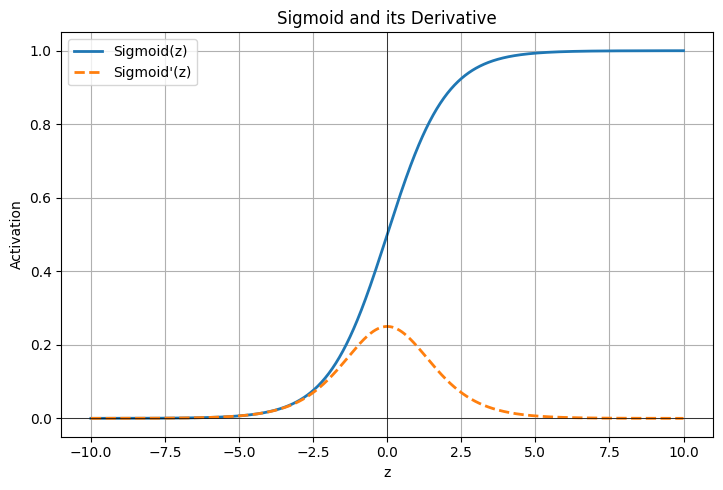

In [8]:
plt.figure(figsize=(14, 5))


plt.subplot(1, 2, 2)
plt.plot(z, sigmoid_vals, label='Sigmoid(z)', linewidth=2)
plt.plot(z, sigmoid_prime_vals, label="Sigmoid'(z)", linestyle='--', linewidth=2)
plt.xlabel('z')
plt.ylabel('Activation')
plt.title('Sigmoid and its Derivative')
plt.legend()
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

plt.tight_layout()
plt.show()

Accuracy before training: 0.1220
Epoch 100, Loss: 5.6279
Epoch 200, Loss: 3.9058
Epoch 300, Loss: 2.9437
Epoch 400, Loss: 2.3209
Epoch 500, Loss: 1.8945
Epoch 600, Loss: 1.5990
Epoch 700, Loss: 1.3852
Epoch 800, Loss: 1.2199
Epoch 900, Loss: 1.0868
Epoch 1000, Loss: 0.9770
Accuracy after training: 0.7540


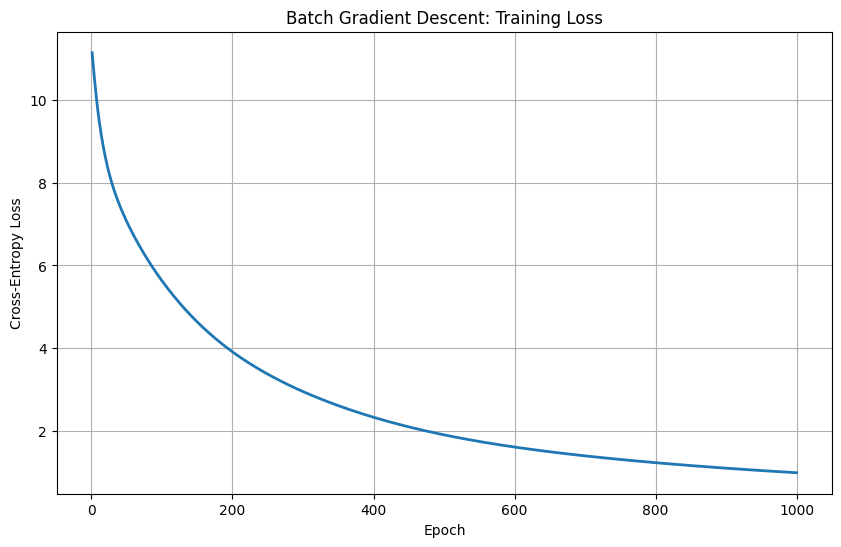

In [ ]:

DATA_PATH = 'C:/Users/lucia/OneDrive/Documents/CognitiveSystems/WiSe1/aNLP/assignment_2/assignment_2/data/dataset.csv'



sentences, intent, unique_intent = load_dataset(DATA_PATH)
X = bag_of_words_matrix(sentences)
Y = labels_matrix((sentences, intent, unique_intent))

V = X.shape[0]
K = Y.shape[0]

model = NeuralNetwork(input_size=V, hidden_size=150, num_classes=K, seed=1)

costs = batch_train(X, Y, model, train_flag=True)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(costs)+1), costs, linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Cross-Entropy Loss')
plt.title('Batch Gradient Descent: Training Loss')
plt.grid(True)
plt.savefig('batch_gd_loss.png', dpi=300)
plt.show()

Accuracy before training: 0.1220
Epoch 100, Loss: 0.5938
Epoch 200, Loss: 0.2769
Epoch 300, Loss: 0.1716
Epoch 400, Loss: 0.1226
Epoch 500, Loss: 0.0918
Epoch 600, Loss: 0.0727
Epoch 700, Loss: 0.0597
Epoch 800, Loss: 0.0503
Epoch 900, Loss: 0.0448
Epoch 1000, Loss: 0.0404
Accuracy after training: 0.9930


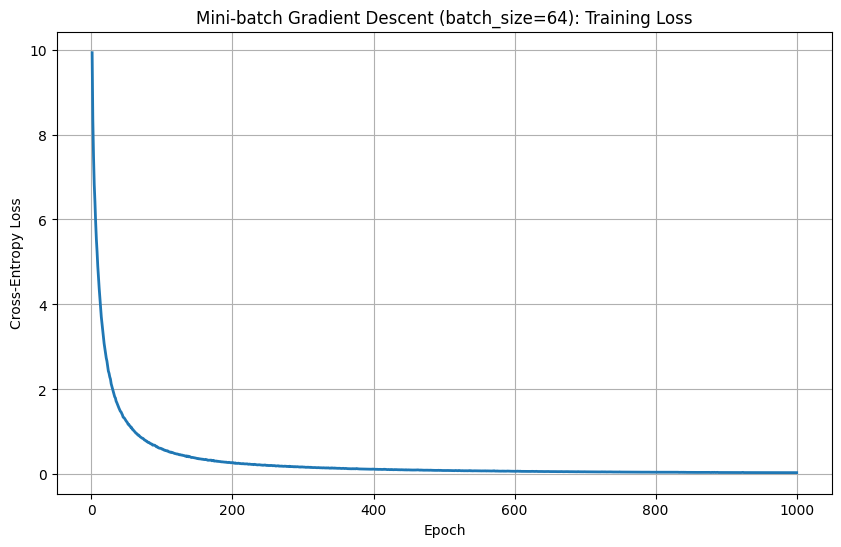

In [4]:
DATA_PATH = 'C:/Users/lucia/OneDrive/Documents/CognitiveSystems/WiSe1/aNLP/assignment_2/assignment_2/data/dataset.csv'

sentences, intent, unique_intent = load_dataset(DATA_PATH)
X = bag_of_words_matrix(sentences)
Y = labels_matrix((sentences, intent, unique_intent))

V = X.shape[0]
K = Y.shape[0]

model_minibatch = NeuralNetwork(input_size=V, hidden_size=150, num_classes=K, seed=1)

costs_minibatch = minibatch_train(X, Y, model_minibatch, train_flag=True)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(costs_minibatch)+1), costs_minibatch, linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Cross-Entropy Loss')
plt.title('Mini-batch Gradient Descent (batch_size=64): Training Loss')
plt.grid(True)
plt.savefig('minibatch_gd_loss.png', dpi=300)
plt.show()